# 📚Importing Libraries
In this section we imported all the necesarry libraries for the project.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import os
import numpy as np
import torch.nn.functional as F
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 🖥️Dataset

In [ ]:
# Define transformations for the training and test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Download and prepare the CIFAR10 training dataset
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

# Download and prepare the CIFAR10 test dataset
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders for training and testing datasets
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Check the structure of the dataset
classes = training_data.classes
print(f"Classes: {classes}")
print(f"Number of training samples: {len(training_data)}")
print(f"Number of testing samples: {len(test_data)}")
print("The length of the dataset is {0:d}".format(len(training_data)+ len(test_data)))

Files already downloaded and verified
Files already downloaded and verified
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of training samples: 50000
Number of testing samples: 10000
The length of the dataset is 60000


In [ ]:
type(training_data)

torchvision.datasets.cifar.CIFAR10

In [ ]:
data_type = type(training_data[2500])
first_part_tuple = training_data[2500][0]
type_first_element = type(first_part_tuple)
shape = first_part_tuple.size()
permuted_picture =  first_part_tuple.permute(1, 2, 0)
print("The type of data you have extracted from CIFAR10 is {0:s}".format(str(data_type)))
print("The first part of the tuple is a {0:s}".format(str(type_first_element)))
print("The shape of the Torch tensor is {0:s}".format(str(shape)))
print ("The shape of the permuted image is now: {0:s}".format(str(permuted_picture.size())))

The type of data you have extracted from CIFAR10 is <class 'tuple'>
The first part of the tuple is a <class 'torch.Tensor'>
The shape of the Torch tensor is torch.Size([3, 32, 32])
The shape of the permuted image is now: torch.Size([32, 32, 3])


The second value of the tuple place in the 2500th position is 5


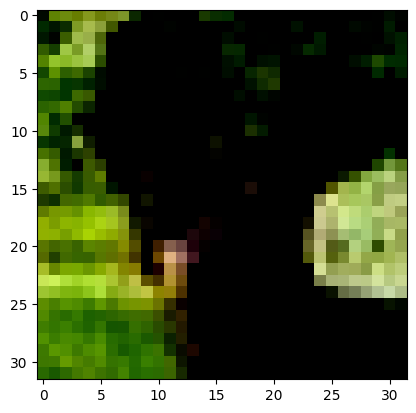

In [ ]:
plt.imshow(permuted_picture,cmap='gray', vmin=0, vmax=1)
second_value =  training_data[2500][1]
print("The second value of the tuple place in the 2500th position is {0:d}".format(second_value))

The picture in the position number 15578 is a Deer


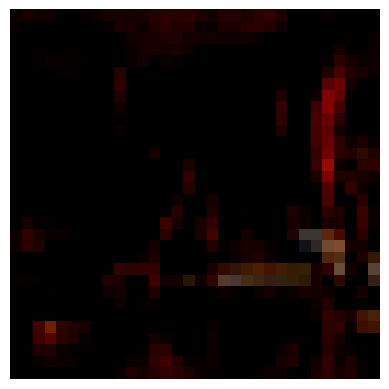

In [ ]:
#Label dictionary to match CIFAR10 classes
label_dict = {0: 'Airplane',1: 'Automobile',2: 'Bird',3: 'Cat',4: 'Deer',5: 'Dog',6: 'Frog',7: 'Horse',8: 'Ship',9: 'Truck'}

# Index of the picture to display
pic = 15578


picture = training_data[pic][0]  # Retrieve the image
permuted_picture = picture.permute(1, 2, 0)  # Rearrange dimensions to (H, W, C) for imshow
plt.imshow(permuted_picture)
plt.axis('off')  # Turn off axis labels for better visualization


# Print the label for the selected image
print("The picture in the position number {0:d} is a {1:s}".format(pic, label_dict[training_data[pic][1]]))

STRUCTURING DATASETS

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


# 💯 First Machine Learning Model


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("I have found {0:s} device".format(device))

I have found cuda device


In [ ]:
if torch.cuda.is_available():
    print("There is a GPU available with the name {0:s}".format(torch.cuda.get_device_name(0)))
    torch.cuda.get_device_name(0)

There is a GPU available with the name Tesla T4


BUILD THE ARQUITECHTURE

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(32 * 32 * 3, 512)  # Input size: 3072
        self.dropout1 = nn.Dropout(0.1)             # Dropout layer
        self.Linear2 = nn.Linear(512, 256)         # Hidden layer (reducido a 256)
        self.dropout2 = nn.Dropout(0.2)             # Dropout layer
        self.Linear3 = nn.Linear(256, 128)         # Hidden layer
        self.Linear4 = nn.Linear(128, 10)          # Output layer

    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = self.dropout1(x)                       # Aplicar dropout
        x = F.relu(self.Linear2(x))
        x = self.dropout2(x)                       # Aplicar dropout
        x = F.relu(self.Linear3(x))
        output = self.Linear4(x)                   # Sin activación aquí
        return output

# Inicialización del modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyNeuralNetwork().to(device)




In [ ]:
print(model)

MyNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=3072, out_features=512, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (Linear2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (Linear3): Linear(in_features=256, out_features=128, bias=True)
  (Linear4): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
class MyAlternativeNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(32 * 32 * 3, 512) # Input size: 3072
        self.Linear2 = nn.Linear(512, 512)
        self.Linear3 = nn.Linear(512, 1024)
        self.Linear4 = nn.Linear(1024, 10)

    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        x = F.relu(self.Linear3(x))
        output = F.relu(self.Linear4(x))
        return output


my_other_model = MyAlternativeNeuralNetwork().to(device)

### Your code ends here

print(my_other_model)

MyAlternativeNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=3072, out_features=512, bias=True)
  (Linear2): Linear(in_features=512, out_features=512, bias=True)
  (Linear3): Linear(in_features=512, out_features=1024, bias=True)
  (Linear4): Linear(in_features=1024, out_features=10, bias=True)
)


In [ ]:
#CROSS ENTROPY
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Optimization
        optimizer.step()

        # printing the loss every 100 epoc
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print("Loss with batch nº {0:d}: {1:.6f}".format(current,loss))

In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print("X {0:d}: {1:s}".format(batch,str(X.size())))
    print("y {0:d}: {1:s}".format(batch,str(y.size())))


NameError: name 'train_dataloader' is not defined

DEFINE THE TEST FUNCTION

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = test_loss / num_batches

    accuracy = (correct / size) * 100

    print("Test Error: \n Accuracy: {0:.2f} %, Average loss: {1:.6f}".format(accuracy,avg_loss))

PUT ALL TOGETHER

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"\nEpoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("\nTraining done!")


Epoch 1
-------------------------------
Loss with batch nº 64: 2.303153
Loss with batch nº 6464: 2.032189
Loss with batch nº 12864: 1.639884
Loss with batch nº 19264: 1.891690
Loss with batch nº 25664: 1.781159
Loss with batch nº 32064: 1.808279
Loss with batch nº 38464: 1.674407
Loss with batch nº 44864: 1.636647
Test Error: 
 Accuracy: 39.95 %, Average loss: 1.678949

Epoch 2
-------------------------------
Loss with batch nº 64: 1.693588
Loss with batch nº 6464: 1.496599
Loss with batch nº 12864: 1.297359
Loss with batch nº 19264: 1.683023
Loss with batch nº 25664: 1.541471
Loss with batch nº 32064: 1.648179
Loss with batch nº 38464: 1.627792
Loss with batch nº 44864: 1.500667
Test Error: 
 Accuracy: 43.59 %, Average loss: 1.588897

Epoch 3
-------------------------------
Loss with batch nº 64: 1.574354
Loss with batch nº 6464: 1.500620
Loss with batch nº 12864: 1.192904
Loss with batch nº 19264: 1.512006
Loss with batch nº 25664: 1.420489
Loss with batch nº 32064: 1.528412
Loss wi

SAVE THE MODEL


In [ ]:
torch.save(model.state_dict(), "first_model.pth")
print("Saved PyTorch Model State to first_model.pth")

Saved PyTorch Model State to first_model.pth


LOADING THE MODEL

In [ ]:
model = MyNeuralNetwork()
model.load_state_dict(torch.load("first_model.pth"))

<ipython-input-45-32e8359e9dad>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("first_model.pth"))


<All keys matched successfully>

PREDICT THE TYPE OF IMAGE

In [ ]:
def cifar10_predictor(sample, model):
    classes = [
        "Airplane",
        "Automobile",
        "Bird",
        "Cat",
        "Deer",
        "Dog",
        "Frog",
        "Horse",
        "Ship",
        "Truck"
    ]
    x, y = sample[0], sample[1]  # Extract the image and label
    x = x.unsqueeze(0)  # Add a batch dimension (1, C, H, W)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        x = x.to(next(model.parameters()).device)  # Move the input to the same device as the model
        pred = model(x)  # Forward pass
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        return predicted, actual


In [ ]:
# Select a sample from the test dataset
sample = test_data[7300]

# Predict using the cifar10_predictor function
predicted, actual = cifar10_predictor(sample, my_other_model)

### Your code ends here ###

# Print the prediction and actual label
print("Predicted: {0:s}, Actual: {1:s}".format(predicted, actual))


Predicted: Dog, Actual: Cat


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def cifar10_predict_from_image(url, model):
    classes = [
        "Airplane",
        "Automobile",
        "Bird",
        "Cat",
        "Deer",
        "Dog",
        "Frog",
        "Horse",
        "Ship",
        "Truck"
    ]

    # Open the image and convert to RGB (CIFAR10 uses RGB images)
    img = Image.open(url).convert('RGB')

    # Resize the image to 32x32 pixels (CIFAR10 size)
    image = np.array(img.resize((32, 32)))/255  # Normalize to range [0, 1]

    # Permute the image dimensions to (C, H, W) for PyTorch
    image = np.transpose(image, (2, 0, 1))

    # Convert to Torch tensor and add batch dimension
    torch_image = torch.from_numpy(image).unsqueeze(0).float()

    # Predicting
    with torch.no_grad():
        torch_image = torch_image.to(next(model.parameters()).device)  # Move to the same device as the model
        pred = model(torch_image)

    # Matching the prediction with the class name
    predicted = classes[pred[0].argmax(0)]

    return predicted, image


The machine has predicted that your picture is a Airplane.


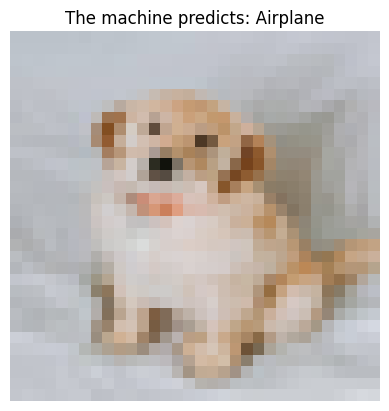

In [ ]:

# Predict the class of an image using the updated function
cifar10_prediction, processed_image = cifar10_predict_from_image('/content/perro.jpg', my_other_model)

### Your code ends here ###

# Display the result
print('The machine has predicted that your picture is a {0:s}.'.format(cifar10_prediction))

# Display the processed image
plt.imshow(np.transpose(processed_image, (1, 2, 0)))  # Convert (C, H, W) to (H, W, C) for RGB display
plt.axis('off')  # Turn off axis
plt.title(f"The machine predicts: {cifar10_prediction}")
plt.show()


# 👌 80% Accuracy Model

Transformations to data

In [ ]:
# Random Transformations and normalization of the data for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Normalization for testing
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

Define the device for training

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("I have found {0:s} device".format(device))

I have found cuda device


Building the CNN Arquitechture

In [ ]:
# Define the CNN model
class second_model(nn.Module):
    def __init__(self):
        super(second_model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.fc2(x)
        return x

Parameters

In [ ]:
# Initialize model, loss function, optimizer, and learning rate scheduler
model = second_model().to(device)
loss_fn_2 = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Training and Validation Functions

In [1]:
# Training function
def train(model, train_loader, loss_fn_2, optimizer):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn_2(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)

# Validation function
def validate(model, test_loader, loss_fn_2):
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn_2(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return val_loss / len(test_loader), accuracy

# Train and validate the model
num_epochs = 30
best_accuracy = 0.0
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, loss_fn_2, optimizer)
    val_loss, val_accuracy = validate(model, test_loader, loss_fn_2)
    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    # Save the best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

print(f"Training complete. Best Validation Accuracy: {best_accuracy:.2f}%")

NameError: name 'model' is not defined

Testing the model with pictures that are not in the dataset

<ipython-input-77-4247e1391c92>:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


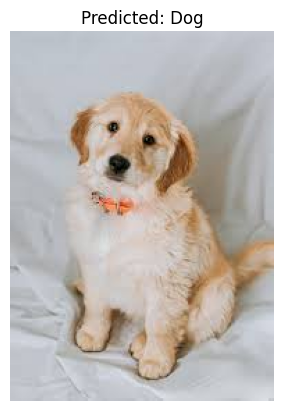

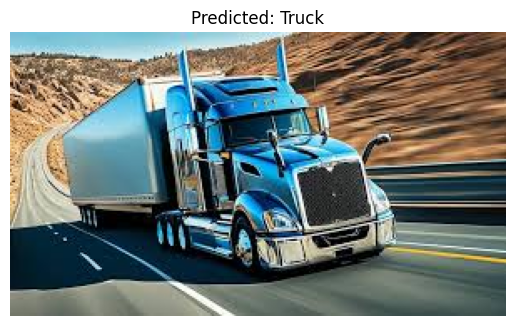

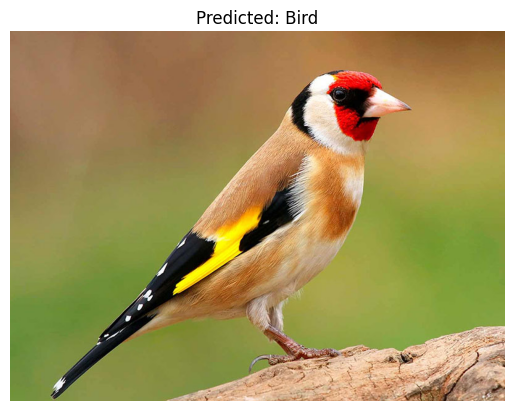

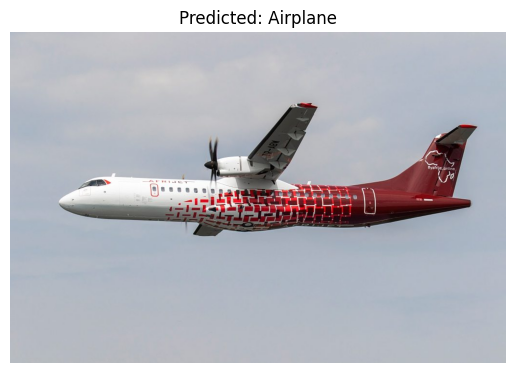

The model predicts for /content/perro.jpg: Dog
The model predicts for /content/truck.jpg: Truck
The model predicts for /content/bird.jpg: Bird
The model predicts for /content/aeroplane.jpeg: Airplane


In [ ]:
# Function to test model with multiple images
def test_with_images(image_paths, model):
    model.eval()
    classes = [
        "Airplane",
        "Automobile",
        "Bird",
        "Cat",
        "Deer",
        "Dog",
        "Frog",
        "Horse",
        "Ship",
        "Truck"
    ]

    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    predictions = {}

    for image_path in image_paths:
        # Load and preprocess the image
        img = Image.open(image_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)

        # Predict the class
        with torch.no_grad():
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            class_name = classes[predicted.item()]

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {class_name}")
        plt.axis('off')
        plt.show()

        predictions[image_path] = class_name

    return predictions

# Example usage
# Make sure to load the saved model before testing
model.load_state_dict(torch.load('best_model.pth'))
image_paths = ['/content/perro.jpg', '/content/truck.jpg','/content/bird.jpg','/content/aeroplane.jpeg']  # Replace with your image paths
predictions = test_with_images(image_paths, model)
for image_path, predicted_class in predictions.items():
    print(f"The model predicts for {image_path}: {predicted_class}")